[**Demo %s**](#demo-fitting-tempinterp)

Here are 5-year averages of the worldwide temperature anomaly as compared to the 1951–1980 average (source: NASA).

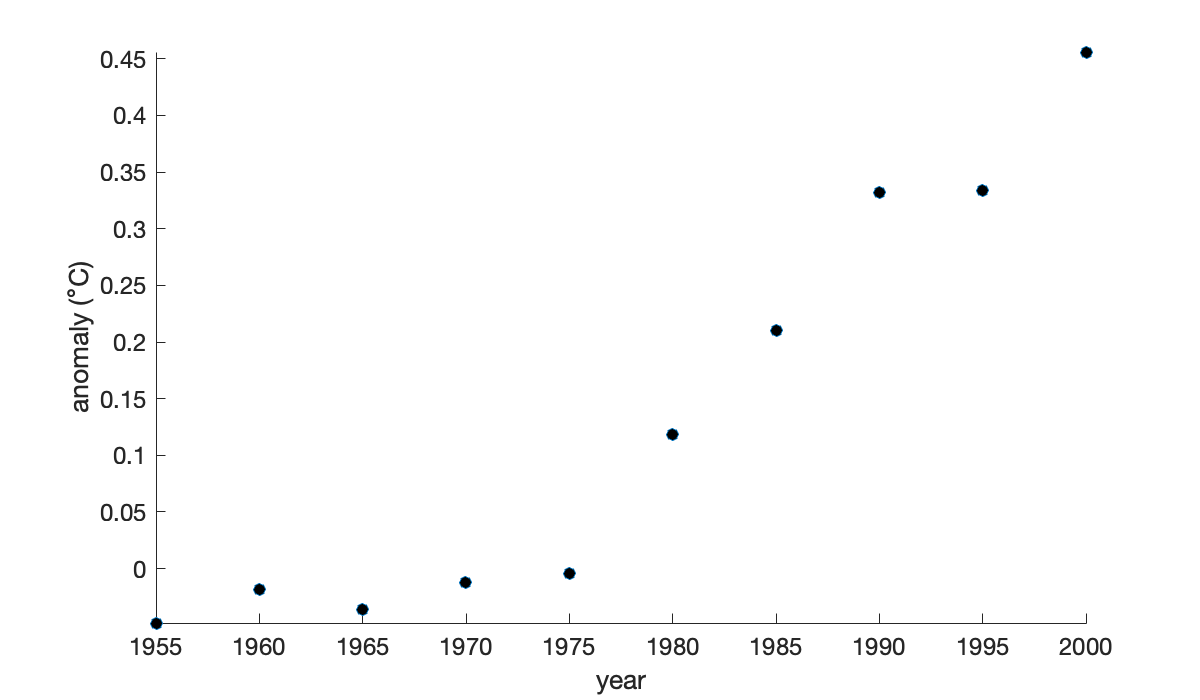

In [2]:
t = (1955:5:2000)';
y = [ -0.0480; -0.0180; -0.0360; -0.0120; -0.0040;
    0.1180; 0.2100; 0.3320; 0.3340; 0.4560 ];
scatter(t, y), axis tight
xlabel('year')
ylabel(('anomaly ({\circ}C)'));

A polynomial interpolant can be used to fit the data. Here we build one using a Vandermonde matrix. First, though, we express time as decades since 1950, as it improves the condition number of the matrix.

In [3]:
t = (t - 1950) / 10;  
n = length(t);
V = ones(n, 1);    % t^0
for j = 1:n-1
    V(:, j+1) = t .* V(:,j);
end
c = V \ y;    % solve for coefficients

We created the Vandermonde matrix columns in increasing-degree order. Thus, the coefficients in `c` also follow that ordering, which is the opposite of what MATLAB uses. We need to flip the coefficients before using them in `polyval`.

```{index} ! MATLAB; fplot, MATLAB; polyval
```

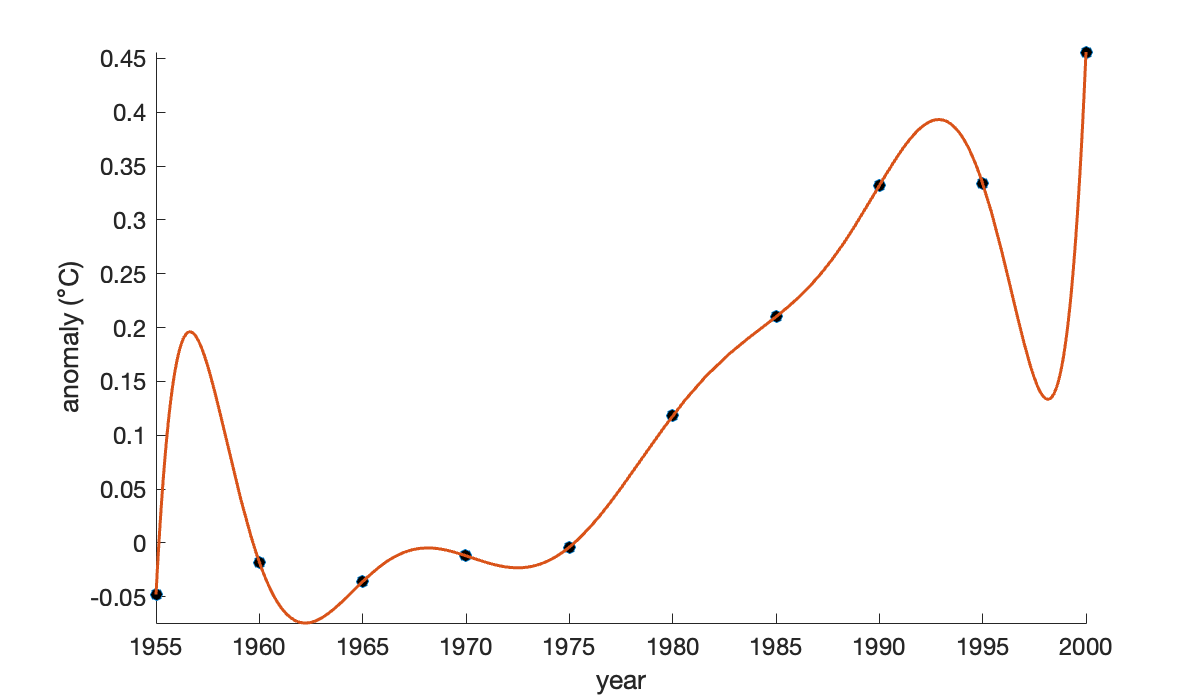

In [4]:
p = @(year) polyval(c(end:-1:1), (year - 1950) / 10);
hold on
fplot(p, [1955, 2000])    % plot the interpolating function